#Importing libraries:


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score

##Loading dataset:


In [ ]:
data=pd.read_csv('/content/StudentPerformanceFactors.csv')
df=data.copy()

##Data preprocessing And EDA:

In [ ]:
df.head(4)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71


In [ ]:
df.shape

(6607, 20)

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df.tail(4)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [ ]:
len(df)

6607

In [ ]:
df.duplicated().sum()

np.int64(0)

Text(0.5, 1.0, 'Gender Distribution')

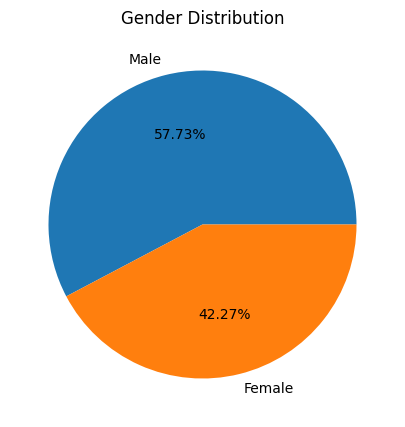

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(df['Gender'].value_counts(),labels=df['Gender'].value_counts().index,autopct='%1.2f%%')
plt.title('Gender Distribution')

<Axes: xlabel='Gender', ylabel='count'>

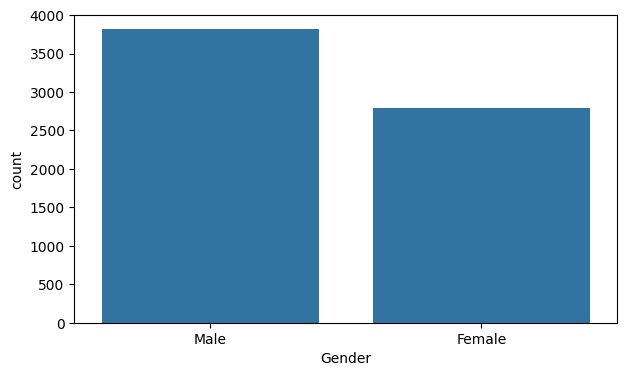

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(data=df,x='Gender')

<Axes: xlabel='Teacher_Quality', ylabel='Count'>

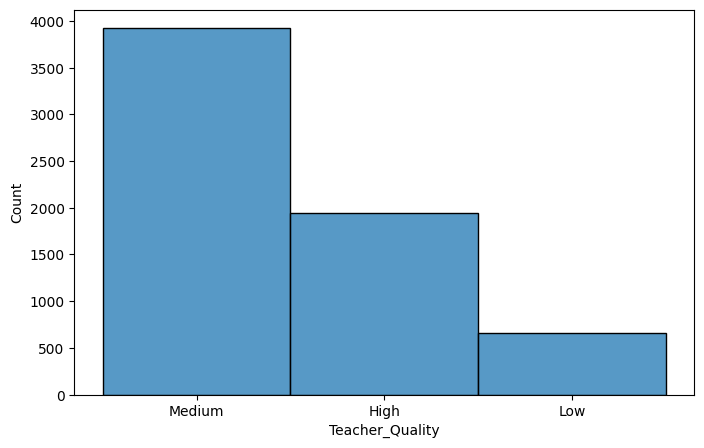

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=df,x='Teacher_Quality')

Text(0.5, 1.0, 'School Type Distribution')

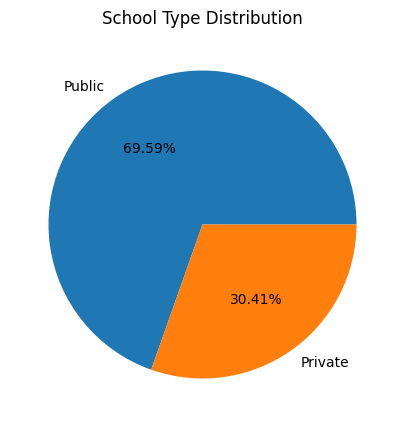

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(df['School_Type'].value_counts(),labels=df['School_Type'].value_counts().index,autopct='%1.2f%%')
plt.title('School Type Distribution')

<Axes: xlabel='Access_to_Resources', ylabel='count'>

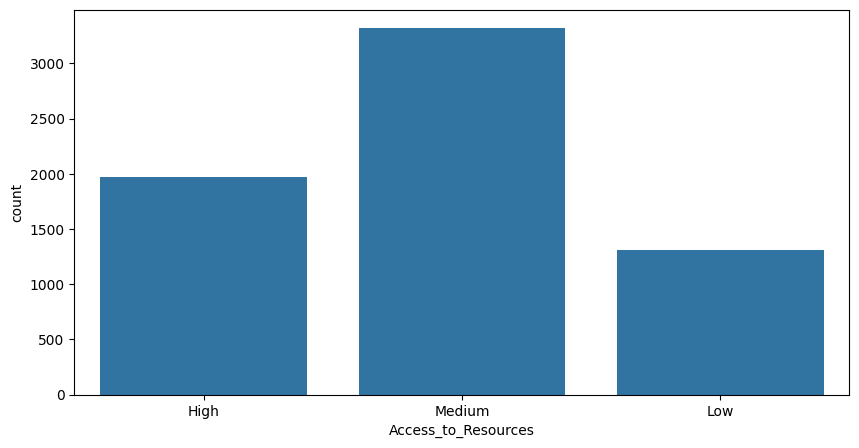

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Access_to_Resources')

Text(0.5, 1.0, 'Learning Disabilities Distribution')

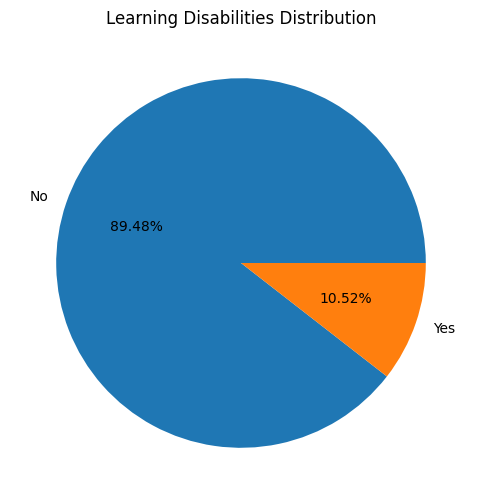

In [ ]:
plt.figure(figsize=(10,6))
plt.pie(df['Learning_Disabilities'].value_counts(),labels=df['Learning_Disabilities'].value_counts().index,autopct="%1.2f%%")
plt.title('Learning Disabilities Distribution')

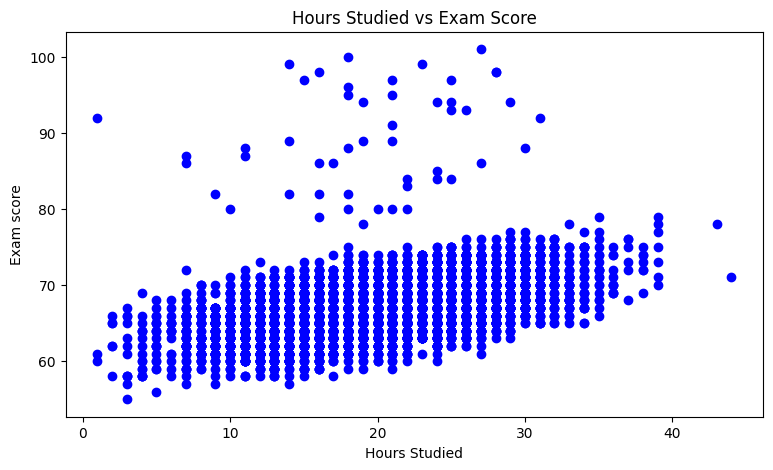

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(x=df['Hours_Studied'],y=df['Exam_Score'],color='blue')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam score')
plt.show()


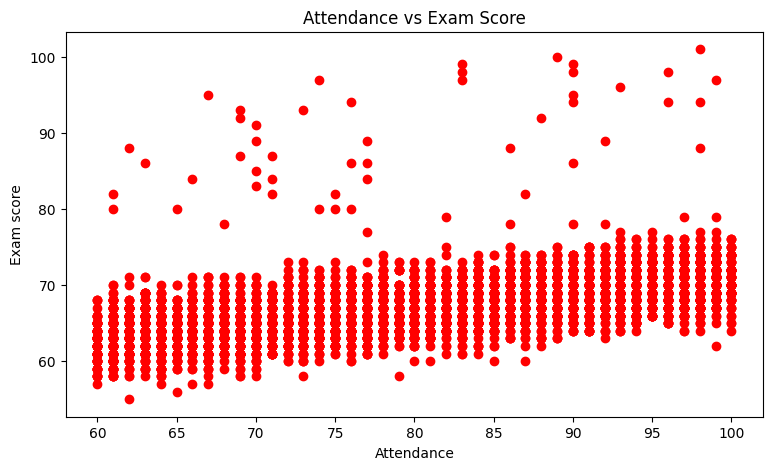

In [ ]:
plt.figure(figsize=(9,5))
plt.scatter(x=df['Attendance'],y=df['Exam_Score'],color='red')
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam score')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [ ]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df['Teacher_Quality']=df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0])
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate', nan], dtype=object)

In [ ]:
df['Parental_Education_Level']=df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0])
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far', nan], dtype=object)

In [ ]:
df['Distance_from_Home']=df['Distance_from_Home'].fillna(df["Distance_from_Home"].mode()[0])
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
lb_encoder=LabelEncoder()
df['Parental_Involvement']=lb_encoder.fit_transform(df['Parental_Involvement'])
df.head(3)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,1,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,2,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74


In [ ]:
df['Access_to_Resources']=lb_encoder.fit_transform(df['Access_to_Resources'])
df['Extracurricular_Activities']=lb_encoder.fit_transform(df['Extracurricular_Activities'])
df['Motivation_Level']=lb_encoder.fit_transform(df['Motivation_Level'])
df['Internet_Access']=lb_encoder.fit_transform(df['Internet_Access'])
df['Family_Income']=lb_encoder.fit_transform(df['Family_Income'])
df['Teacher_Quality']=lb_encoder.fit_transform(df['Teacher_Quality'])
df['School_Type']=lb_encoder.fit_transform(df['School_Type'])
df['Peer_Influence']=lb_encoder.fit_transform(df['Peer_Influence'])
df['Parental_Education_Level']=lb_encoder.fit_transform(df['Parental_Education_Level'])
df['Distance_from_Home']=lb_encoder.fit_transform(df['Distance_from_Home'])
df['Gender']=lb_encoder.fit_transform(df['Gender'])
df['Learning_Disabilities']=lb_encoder.fit_transform(df['Learning_Disabilities'])
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


#Finding correalation:

In [ ]:
correl=df.corrwith(df['Exam_Score'])
correl

,0
Hours_Studied,0.445455
Attendance,0.581072
Parental_Involvement,-0.094289
Access_to_Resources,-0.090503
Extracurricular_Activities,0.064382
Sleep_Hours,-0.017022
Previous_Scores,0.175079
Motivation_Level,-0.014910
Internet_Access,0.051475
Tutoring_Sessions,0.156525


In [ ]:
correl.sort_values(ascending=False)

,0
Exam_Score,1.000000
Attendance,0.581072
Hours_Studied,0.445455
Previous_Scores,0.175079
Tutoring_Sessions,0.156525
Peer_Influence,0.100217
Distance_from_Home,0.088934
Extracurricular_Activities,0.064382
Internet_Access,0.051475
Parental_Education_Level,0.044574


###Selecting variables for simple linear Regresssion


In [ ]:
X=df[['Attendance']]
y=df['Exam_Score']

###Splitting of data for simple linear Regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [ ]:
len(X_train),len(X_test)

(5285, 1322)

##Model selection and training:


In [ ]:
lin_regression=LinearRegression()
lin_regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict_train=lin_regression.predict(X_train)
y_predict_tst=lin_regression.predict(X_test)

###Evaluation

In [ ]:
print('MSE for Simple Linear Regression:',mean_squared_error(y_train,y_predict_train))
print('R2 score :',r2_score(y_train,y_predict_train))


MSE for Simple Linear Regression: 5.234805508090781
R2 score : 0.6523456523804704


In [ ]:
print('MSE for Simple Linear Regression:',mean_squared_error(y_test,y_predict_tst))
print('R2 score :',r2_score(y_test,y_predict_tst))

MSE for Simple Linear Regression: 5.4272975934447105
R2 score : 0.6484004536667858


##Multiple linear Regression:

In [ ]:
X=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
mlinearR=LinearRegression()
mlinearR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict_train2=mlinearR.predict(X_train)
y_predict_tst2=mlinearR.predict(X_test)


Evaluation:

In [ ]:
print('MSE for Simple Linear Regression:',mean_squared_error(y_train,y_predict_train2))
print('R2 score :',r2_score(y_train,y_predict_train2))


MSE for Simple Linear Regression: 25.200345879988276
R2 score : -0.62168886436647


In [ ]:
print('MSE for Simple Linear Regression:',mean_squared_error(y_test,y_predict_tst2))
print('R2 score :',r2_score(y_test,y_predict_tst2))

MSE for Simple Linear Regression: 23.107691584767004
R2 score : -0.7106580334742145


##using polynomial Regression:

In [ ]:
from sklearn.preprocessing import PolynomialFeatures



In [ ]:
X=df.drop('Exam_Score',axis=1)
y=df['Exam_Score']

In [ ]:
pf=PolynomialFeatures(degree=2)
X_poly=pf.fit_transform(X)

In [ ]:
X_poly_train,X_poly_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.2,random_state=43)

In [ ]:
plr=LinearRegression()
plr.fit(X_poly_train,y_train)


LinearRegression()

In [ ]:
y_predict_plr=plr.predict(X_poly_train)

y_predict_tst_plr=plr.predict(X_poly_test)

#Evaluation:

In [ ]:
print('MSE for polynomial Regression:',mean_squared_error(y_train,y_predict_plr))
print('R2 score :',r2_score(y_train,y_predict_plr))

MSE for polynomial Regression: 4.324570621847976
R2 score : 0.7217058823709881


In [ ]:
print('MSE for polynomial Regression:',mean_squared_error(y_test,y_predict_tst_plr))
print('R2 score :',r2_score(y_test,y_predict_tst_plr))

MSE for polynomial Regression: 2.906050250886447
R2 score : 0.7848656500748955


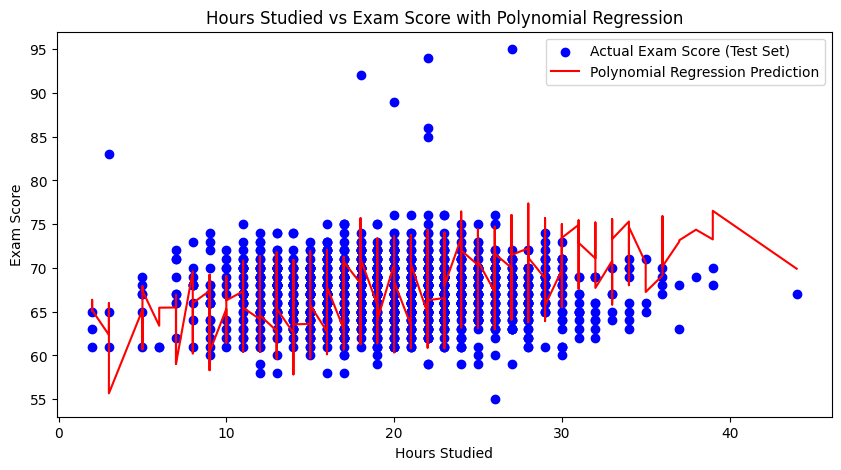

In [ ]:
plt.figure(figsize=(10,5))

# To plot the polynomial regression line smoothly, we need to sort the test data
X_test_sorted = X_test.sort_values(by='Hours_Studied')
X_test_poly_sorted = pf.transform(X_test_sorted)
y_predict_tst_plr_sorted = plr.predict(X_test_poly_sorted)


plt.scatter(X_test['Hours_Studied'], y_test, color='blue', label='Actual Exam Score (Test Set)')
plt.plot(X_test_sorted['Hours_Studied'], y_predict_tst_plr_sorted, color='red', label='Polynomial Regression Prediction')
plt.title('Hours Studied vs Exam Score with Polynomial Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()